In [1]:
!pip install geopandas
!pip install folium
!pip install lightgbm
!pip install utm
!pip install geojson 
!pip install haversine

# folium 한글 설치
!pip install git+https://github.com/python-visualization/branca.git@master

# 시각화 도구 설치
!pip install plotnine #R 시각화 
!pip install mglearn
!pip install folium #지도 시각화 

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 14.8MB 308kB/s 
     |████████████████████████████████| 10.9MB 50.6MB/s 
  Created wheel for utm: filename=utm-0.6.0-cp36-none-any.whl size=6095 sha256=fbfe8580b6e1c0d5ac7e19e572226f8f6f4b4f53ebef0271c69142d1b23961dc
  Stored in directory: /root/.cache/pip/wheels/9a/76/b2/58ad7ade8b0475c577f80ee8023d7164fd561bb45c20b4beab
Successfully built utm
  Cloning https://github.com/python-visualization/branca.git (to revision master) to /tmp/pip-req-build-7lmk2j9o
  Running command git clone -q https://github.com/python-visualization/branca.git /tmp/pip-req-build-7lmk2j9o
  Created wheel for branca: filename=branca-0.4.1+3.g5887b9b-cp36-none-any.whl size=24523 sha256=2dc01fdb19dcb01f0ef2d10464c000d703768285477ea8151ebf75da8447c0a4
  Stored in directory: /tmp/pip-ephem-wheel-cache-vl547a62/wheels/14/bc/41/d6078abe73beea93d98c014bba54c395224cabb54f95b9d248
Successfully built branca
ERROR: datascience 0.

In [2]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 144611 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [3]:
!pip install pickle5

     |████████████████████████████████| 133kB 2.8MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp36-cp36m-linux_x86_64.whl size=218623 sha256=42f78e20ea3111510a55c9c179656263514703e3ae2c101004f20288e710c89f
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [1]:
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()

NanumGothic Eco


In [2]:
import pandas as pd
import mglearn
import pickle5 as pickle
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
import folium 
import geopandas as gpd
import math
from tqdm.notebook import tqdm
import utm
from shapely.geometry import Point, Polygon
from haversine import haversine
from plotnine import *

## 데이터로드

In [3]:
df_demand =pd.read_pickle('/content/drive/My Drive/Project/Seoul/지수_결과/1014수정_인프라지수.pickle')[['행정동코드', '행정동', 'new수요지수','100분위']]
df_demand['100분위'] = df_demand['100분위'].astype(int)
df_demand['행정동코드'] = df_demand['행정동코드'].astype(int)
df_demand

,행정동코드,행정동,new수요지수,100분위
0,1165065100,양재1동,2.911910e-05,2
1,1153078000,오류제2동,7.399572e-05,6
2,1150063000,방화제1동,9.837376e-05,8
3,1138069000,진관동,5.887938e-05,5
4,1138062500,역촌동,1.043019e-04,8
...,...,...,...,...
419,1114057000,필동,5.739099e-07,1
420,1114059000,광희동,1.084052e-06,1
421,1111054000,삼청동,1.052168e-06,1
422,1114060500,을지로동,1.870521e-07,1


In [4]:
df_demand.sort_values(by = '100분위', ascending=False)

,행정동코드,행정동,new수요지수,100분위
316,1165066000,내곡동,2.459866e-04,10
290,1130560300,번2동,2.247890e-04,10
132,1121586000,구의제2동,1.355633e-04,10
28,1135070000,상계8동,1.697615e-04,10
281,1171067000,잠실2동,1.682111e-04,10
...,...,...,...,...
389,1141072000,북가좌제2동,4.375932e-07,1
390,1165058100,반포4동,2.956245e-07,1
394,1150060500,가양제3동,1.605111e-05,1
395,1150056000,화곡제3동,4.007872e-07,1


In [5]:
df_alone = pd.read_csv("/content/drive/My Drive/Project/Seoul/지수_결과/역수취한 최종 돌봄 틈새공백 인구.csv")
df_alone

,Unnamed: 0,행정동코드,시군구명,행정동명,돌봄 틈새공백 인구,동별 돌봄 틈새공백 인구 비율,돌봄틈새공백 분위
0,0,1117051000,용산구,후암동,3.608846,0.003152,4
1,1,1117057000,용산구,원효로2동,3.445290,0.003107,4
2,2,1117064000,용산구,이촌2동,1.544051,0.003132,1
3,3,1117066000,용산구,이태원2동,1.508517,0.003337,1
4,4,1117069000,용산구,서빙고동,3.587631,0.003040,4
...,...,...,...,...,...,...,...
419,419,1120072000,성동구,송정동,1.773041,0.003189,2
420,420,1120067000,성동구,성수2가1동,2.749154,0.003167,3
421,421,1120053500,성동구,왕십리도선동,6.841889,0.003455,8
422,422,1120064500,성동구,옥수동,8.163456,0.003818,8


In [6]:
df_alone.sort_values(by = '돌봄틈새공백 분위', ascending=False)

,Unnamed: 0,행정동코드,시군구명,행정동명,돌봄 틈새공백 인구,동별 돌봄 틈새공백 인구 비율,돌봄틈새공백 분위
92,92,1147051000,양천구,목1동,19.277092,0.003953,10
374,374,1135062100,노원구,중계1동,17.296338,0.003811,10
283,283,1171068000,송파구,잠실3동,14.454883,0.003526,10
98,98,1168072000,강남구,일원본동,11.540119,0.003435,10
310,310,1121581000,광진구,광장동,18.154043,0.003318,10
...,...,...,...,...,...,...,...
309,309,1121571000,광진구,화양동,1.415339,0.002912,1
50,50,1114052000,중구,소공동,0.691716,0.003953,1
213,213,1162069500,관악구,신림동,1.142016,0.003235,1
47,47,1111064000,종로구,이화동,1.050374,0.002959,1


In [7]:
# 소득 k=3
df_income = pd.read_csv('/content/drive/My Drive/Project/Seoul/지수_결과/행정동별_소득분위k=3_최종_분위수정.csv')
df_income

,행정동코드,읍면동명,시군구명,추정소득 k=3,소득분위
0,1171063100,가락1동,송파구,0.514075,3
1,1171063200,가락2동,송파구,-0.044838,5
2,1171062000,가락본동,송파구,0.131003,4
3,1153059500,가리봉동,구로구,-1.059104,10
4,1154551000,가산동,금천구,-0.801810,10
...,...,...,...,...,...
419,1117058000,효창동,용산구,-0.275550,6
420,1117051000,후암동,용산구,-0.571142,8
421,1123072000,휘경제1동,동대문구,-0.387180,7
422,1123073000,휘경제2동,동대문구,-0.261534,6


In [8]:
df_income.sort_values(by = '소득분위', ascending=False)

,행정동코드,읍면동명,시군구명,추정소득 k=3,소득분위
344,1114058000,장충동,중구,-1.131973,10
79,1132052100,도봉제1동,도봉구,-0.847441,10
254,1147061100,신월7동,양천구,-1.060604,10
36,1138056000,구산동,은평구,-0.853340,10
262,1132066000,쌍문제1동,도봉구,-0.984369,10
...,...,...,...,...,...
271,1168054500,압구정동,강남구,2.543468,1
59,1168053100,논현2동,강남구,1.270274,1
266,1144055500,아현동,마포구,1.401888,1
187,1144066000,서교동,마포구,1.780954,1


#### merge

In [10]:
df_demand['행정동코드'] = df_demand['행정동코드'].astype(int)
df_alone['행정동코드'] = df_alone['행정동코드'].astype(int)
df_income['행정동코드'] = df_income['행정동코드'].astype(int)


df_1 = df_demand.merge(df_alone, on = '행정동코드')
df_final = df_1.merge(df_income, on='행정동코드')

df_pca = df_final.copy()
df_pca = df_pca[['행정동코드','시군구명_x', '행정동', 'new수요지수', '돌봄 틈새공백 인구','추정소득 k=3' ]]
df_pca.columns = ['행정동코드', '시군구명', '행정동명', '인프라지수', '틈새돌봄인구', '추정소득']

df_final = df_final[['행정동코드', '시군구명_x', '행정동명', '100분위','돌봄틈새공백 분위','소득분위']]
df_final.columns = ['행정동코드', '시군구명', '행정동명', '인프라지수_분위','틈새돌봄인구_분위','소득_분위']

In [11]:
df_pca

,행정동코드,시군구명,행정동명,인프라지수,틈새돌봄인구,추정소득
0,1165065100,서초구,양재1동,2.911910e-05,20.058894,0.651861
1,1153078000,구로구,오류제2동,7.399572e-05,15.328145,0.165374
2,1150063000,강서구,방화제1동,9.837376e-05,17.737957,-0.048502
3,1138069000,은평구,진관동,5.887938e-05,24.789692,-0.214553
4,1138062500,은평구,역촌동,1.043019e-04,11.221457,-1.179392
...,...,...,...,...,...,...
419,1114057000,중구,필동,5.739099e-07,0.464104,-0.509803
420,1114059000,중구,광희동,1.084052e-06,0.438543,0.281250
421,1111054000,종로구,삼청동,1.052168e-06,0.449193,-0.023982
422,1114060500,중구,을지로동,1.870521e-07,0.108253,-0.692454


In [12]:
df_final

,행정동코드,시군구명,행정동명,인프라지수_분위,틈새돌봄인구_분위,소득_분위
0,1165065100,서초구,양재1동,2,10,2
1,1153078000,구로구,오류2동,6,10,4
2,1150063000,강서구,방화1동,8,10,5
3,1138069000,은평구,진관동,5,10,5
4,1138062500,은평구,역촌동,8,10,10
...,...,...,...,...,...,...
419,1114057000,중구,필동,1,1,8
420,1114059000,중구,광희동,1,1,3
421,1111054000,종로구,삼청동,1,1,4
422,1114060500,중구,을지로동,1,1,9


## PCA

In [13]:
X = df_pca[['인프라지수', '틈새돌봄인구', '추정소득']]

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)

features = ['인프라지수', '틈새돌봄인구', '추정소득']
pd.DataFrame(X_scale, columns = features).head()

,인프라지수,틈새돌봄인구,추정소득
0,0.112843,0.771715,0.375769
1,0.287029,0.589386,0.277766
2,0.381651,0.682263,0.234681
3,0.228355,0.954046,0.201231
4,0.404660,0.431110,0.006865


In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 1) #주성분 개수 1개

#pca 모델 학습: X_data만 필요
pca.fit(X_scale)

#학습도니 pca 모델을 이용해 data 변환: 차원 축소
data_pca = pca.transform(X_scale)
print("원본 데이터의 형태: ", str(X_scale.shape))
print("축소된 데이터의 형태: ", str(data_pca.shape))

원본 데이터의 형태:  (424, 3)
축소된 데이터의 형태:  (424, 1)


In [16]:
print(pca.components_, sep = "\n\n")

[[0.86689186 0.49590054 0.05080517]]


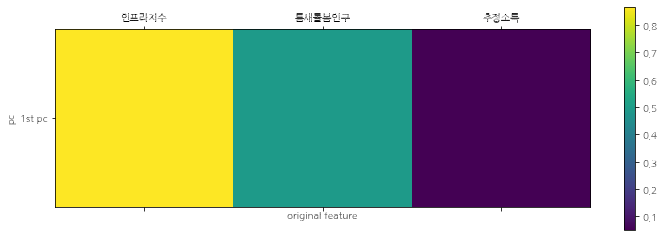

In [17]:
plt.matshow(pca.components_, cmap = 'viridis') #heatmap

plt.xticks(range(len(features)), features) #회전
plt.yticks([0], ["1st pc"])

plt.xlabel('original feature')
plt.ylabel('pc')

plt.colorbar()
plt.show()

In [18]:
pca.explained_variance_

array([0.045724])

In [19]:
pca.explained_variance_ratio_

array([0.47410067])

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2) #주성분 개수 2개

#pca 모델 학습: X_data만 필요
pca.fit(X_scale)

#학습도니 pca 모델을 이용해 data 변환: 차원 축소
data_pca = pca.transform(X_scale)
print("원본 데이터의 형태: ", str(X_scale.shape))
print("축소된 데이터의 형태: ", str(data_pca.shape))

원본 데이터의 형태:  (424, 3)
축소된 데이터의 형태:  (424, 2)


In [21]:
print(pca.components_[0], pca.components_[1], sep = "\n\n")

[0.86689186 0.49590054 0.05080517]

[-0.29162198  0.42183623  0.85849334]


<Figure size 720x360 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


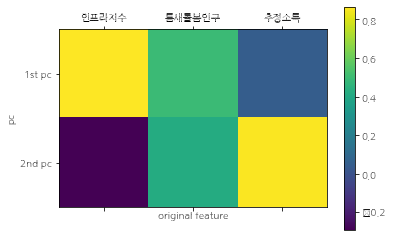

In [27]:
#w 주성분1과 주성분2가 각각 어느정도 데이터를 반영하고 있는가 >> 시각화
plt.figure(figsize=(10,5))
plt.matshow(pca.components_, cmap = 'viridis') #heatmap

plt.xticks(range(len(features)), features, rotation =0) #회전
plt.yticks([0,1], ["1st pc", "2nd pc"])

plt.xlabel('original feature')
plt.ylabel('pc')

plt.colorbar()
plt.show()

In [24]:
pca.explained_variance_ratio_

array([0.47410067, 0.33110088])

In [23]:
result = pd.DataFrame(data_pca, columns = ['pca1', 'pca2'])
result

,pca1,pca2
0,0.120411,0.394163
1,0.176015,0.182320
2,0.301911,0.156916
3,0.302098,0.287551
4,0.185736,-0.151318
...,...,...
419,-0.362035,-0.093001
420,-0.352710,0.042813
421,-0.355738,-0.009765
422,-0.372007,-0.129936


In [ ]:
df_pca_result = pd.concat([df_pca, result], axis=1)
df_pca_result

,행정동코드,시군구명,행정동명,인프라지수,틈새돌봄인구,추정소득,pca1,pca2
0,1165065100,서초구,양재1동,2.911910e-05,20.058894,0.651861,0.120411,0.394163
1,1153078000,구로구,오류제2동,7.399572e-05,15.328145,0.165374,0.176015,0.182320
2,1150063000,강서구,방화제1동,9.837376e-05,17.737957,-0.048502,0.301911,0.156916
3,1138069000,은평구,진관동,5.887938e-05,24.789692,-0.214553,0.302098,0.287551
4,1138062500,은평구,역촌동,1.043019e-04,11.221457,-1.179392,0.185736,-0.151318
...,...,...,...,...,...,...,...,...
419,1114057000,중구,필동,5.739099e-07,0.464104,-0.509803,-0.362035,-0.093001
420,1114059000,중구,광희동,1.084052e-06,0.438543,0.281250,-0.352710,0.042813
421,1111054000,종로구,삼청동,1.052168e-06,0.449193,-0.023982,-0.355738,-0.009765
422,1114060500,중구,을지로동,1.870521e-07,0.108253,-0.692454,-0.372007,-0.129936


In [ ]:
df_pca_result.sort_values('pca1',ascending=False)

,행정동코드,시군구명,행정동명,인프라지수,틈새돌봄인구,추정소득,pca1,pca2
15,1129066000,성북구,길음제1동,2.065628e-04,20.963377,-0.130420,0.726752,0.072728
281,1171067000,송파구,잠실2동,1.682111e-04,25.982035,2.104911,0.716504,0.584316
309,1171063100,송파구,가락1동,2.478326e-04,11.457109,0.514075,0.690523,-0.017079
19,1168072000,강남구,일원본동,2.390110e-04,11.540119,1.849586,0.676095,0.225223
324,1171056600,송파구,오륜동,2.576830e-04,7.927606,1.357572,0.664842,0.060265
...,...,...,...,...,...,...,...,...
421,1111054000,종로구,삼청동,1.052168e-06,0.449193,-0.023982,-0.355738,-0.009765
418,1114054000,중구,회현동,1.428398e-06,0.496277,-0.668424,-0.360168,-0.120877
423,1174069000,강동구,둔촌제1동,4.676303e-08,0.035766,0.643719,-0.360189,0.100125
419,1114057000,중구,필동,5.739099e-07,0.464104,-0.509803,-0.362035,-0.093001


In [ ]:
df_pca_result.sort_values('pca1',ascending=False).head(20)

,행정동코드,시군구명,행정동명,인프라지수,틈새돌봄인구,추정소득,pca1,pca2
15,1129066000,성북구,길음제1동,0.000207,20.963377,-0.130420,0.726752,0.072728
281,1171067000,송파구,잠실2동,0.000168,25.982035,2.104911,0.716504,0.584316
309,1171063100,송파구,가락1동,0.000248,11.457109,0.514075,0.690523,-0.017079
19,1168072000,강남구,일원본동,0.000239,11.540119,1.849586,0.676095,0.225223
324,1171056600,송파구,오륜동,0.000258,7.927606,1.357572,0.664842,0.060265
25,1135058000,노원구,월계3동,0.000249,8.560177,0.313480,0.637954,-0.100501
316,1165066000,서초구,내곡동,0.000246,7.561568,1.222177,0.617105,0.044138
265,1121581000,광진구,광장동,0.000186,18.154043,-0.065768,0.604528,0.061511
63,1174055000,강동구,고덕제1동,0.000193,15.830484,0.775643,0.592972,0.161095
294,1171068000,송파구,잠실3동,0.000184,14.454883,1.045403,0.537396,0.196164


## 기존 선형결합

In [ ]:
# 돌봄에 많이 
a, b, c = 2, 2, 1

df_final['수요지수'] = df_final['인프라지수_분위']*a + df_final['틈새돌봄인구_분위']*b + df_final['소득_분위']*c
df_final = df_final.sort_values(by = '수요지수', ascending = False).reset_index().drop('index', axis=1)
df_final

,행정동코드,시군구명,행정동명,인프라지수_분위,틈새돌봄인구_분위,소득_분위,수요지수
0,1135059500,노원구,공릉1동,10,9,10,48
1,1138062500,은평구,역촌동,8,10,10,46
2,1147064000,양천구,신정3동,10,10,6,46
3,1150054000,강서구,화곡1동,9,9,10,46
4,1150051000,강서구,염창동,9,10,7,45
...,...,...,...,...,...,...,...
419,1111064000,종로구,이화동,1,1,3,7
420,1117064000,용산구,이촌2동,2,1,1,7
421,1114059000,중구,광희동,1,1,3,7
422,1174069000,강동구,둔촌1동,1,1,2,6


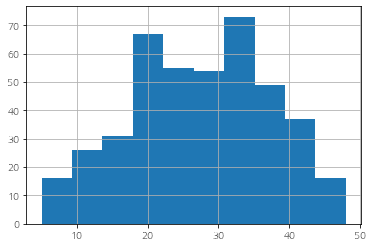

In [ ]:
df_final['수요지수'].hist()

### 현재 키움센터 개수와 비교

공식 = 동별 점수*91 / Sum(동별 점수의 합) - 현재 동별 센터의 개수

In [ ]:
df_supply = pd.read_pickle('/content/drive/My Drive/Project/Seoul/가공데이터/행정동별_주변공적돌봄시설.pickle')
df_supply

,행정동코드,시군구명,읍면동명,키움센터_상시돌봄정원,키움센터_일시돌봄정원,키움센터_개수,초등돌봄교실_이용인원,초등돌봄교실_교실개수,지역아동센터_정원,지역아동센터_개수,방과후아카데미_정원,방과후아카데미_개수
0,1111053000,종로구,사직동,0.0,0.0,0.0,65.0,3.0,0.0,0.0,0.0,0.0
1,1111054000,종로구,삼청동,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1111055000,종로구,부암동,0.0,0.0,0.0,111.0,5.0,0.0,0.0,0.0,0.0
3,1111056000,종로구,평창동,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1111057000,종로구,무악동,0.0,0.0,0.0,80.0,4.0,35.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
420,1174070000,강동구,둔촌제2동,0.0,0.0,0.0,153.0,7.0,50.0,1.0,0.0,0.0
421,1174057000,강동구,암사제1동,20.0,4.0,1.0,97.0,4.0,71.0,2.0,0.0,0.0
422,1174061000,강동구,천호제2동,0.0,0.0,0.0,100.0,4.0,59.0,2.0,0.0,0.0
423,1174068500,강동구,길동,0.0,0.0,0.0,255.0,13.0,129.0,5.0,0.0,0.0


In [ ]:
Sum = df_final['수요지수'].sum()
print(Sum)

df_final['동별_필요센터수'] = df_final[['수요지수']].apply(lambda x: x*400 / Sum)
df_final

11660


,행정동코드,시군구명,행정동명,인프라지수_분위,틈새돌봄인구_분위,소득_분위,수요지수,동별_필요센터수
0,1135059500,노원구,공릉1동,10,9,10,48,1.646655
1,1138062500,은평구,역촌동,8,10,10,46,1.578045
2,1147064000,양천구,신정3동,10,10,6,46,1.578045
3,1150054000,강서구,화곡1동,9,9,10,46,1.578045
4,1150051000,강서구,염창동,9,10,7,45,1.543739
...,...,...,...,...,...,...,...,...
419,1111064000,종로구,이화동,1,1,3,7,0.240137
420,1117064000,용산구,이촌2동,2,1,1,7,0.240137
421,1114059000,중구,광희동,1,1,3,7,0.240137
422,1174069000,강동구,둔촌1동,1,1,2,6,0.205832


In [ ]:
df_final.merge(df_supply[['행정동코드', '키움센터_개수']])

,행정동코드,시군구명,행정동명,인프라지수_분위,틈새돌봄인구_분위,소득_분위,수요지수,동별_필요센터수,키움센터_개수
0,1135059500,노원구,공릉1동,10,9,10,48,1.646655,1.0
1,1138062500,은평구,역촌동,8,10,10,46,1.578045,1.0
2,1147064000,양천구,신정3동,10,10,6,46,1.578045,1.0
3,1150054000,강서구,화곡1동,9,9,10,46,1.578045,0.0
4,1150051000,강서구,염창동,9,10,7,45,1.543739,1.0
...,...,...,...,...,...,...,...,...,...
419,1111064000,종로구,이화동,1,1,3,7,0.240137,0.0
420,1117064000,용산구,이촌2동,2,1,1,7,0.240137,1.0
421,1114059000,중구,광희동,1,1,3,7,0.240137,0.0
422,1174069000,강동구,둔촌1동,1,1,2,6,0.205832,0.0


In [ ]:
df_merge = df_final.merge(df_supply[['행정동코드', '키움센터_개수']])
df_merge['공급미달량'] = df_merge[['동별_필요센터수', '키움센터_개수']].apply(lambda x: x['동별_필요센터수']-x['키움센터_개수'], axis=1)
df_merge

,행정동코드,시군구명,행정동명,인프라지수_분위,틈새돌봄인구_분위,소득_분위,수요지수,동별_필요센터수,키움센터_개수,공급미달량
0,1135059500,노원구,공릉1동,10,9,10,48,1.646655,1.0,0.646655
1,1138062500,은평구,역촌동,8,10,10,46,1.578045,1.0,0.578045
2,1147064000,양천구,신정3동,10,10,6,46,1.578045,1.0,0.578045
3,1150054000,강서구,화곡1동,9,9,10,46,1.578045,0.0,1.578045
4,1150051000,강서구,염창동,9,10,7,45,1.543739,1.0,0.543739
...,...,...,...,...,...,...,...,...,...,...
419,1111064000,종로구,이화동,1,1,3,7,0.240137,0.0,0.240137
420,1117064000,용산구,이촌2동,2,1,1,7,0.240137,1.0,-0.759863
421,1114059000,중구,광희동,1,1,3,7,0.240137,0.0,0.240137
422,1174069000,강동구,둔촌1동,1,1,2,6,0.205832,0.0,0.205832


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


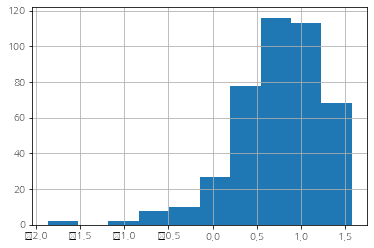

In [ ]:
df_merge['공급미달량'].hist()

In [ ]:
df_merge.sort_values(by='수요지수', ascending = False).head(20)

,행정동코드,시군구명,행정동명,인프라지수_분위,틈새돌봄인구_분위,소득_분위,수요지수,동별_필요센터수,키움센터_개수,공급미달량
0,1135059500,노원구,공릉1동,10,9,10,48,1.646655,1.0,0.646655
2,1147064000,양천구,신정3동,10,10,6,46,1.578045,1.0,0.578045
3,1150054000,강서구,화곡1동,9,9,10,46,1.578045,0.0,1.578045
1,1138062500,은평구,역촌동,8,10,10,46,1.578045,1.0,0.578045
4,1150051000,강서구,염창동,9,10,7,45,1.543739,1.0,0.543739
5,1129066000,성북구,길음1동,10,10,5,45,1.543739,0.0,1.543739
6,1132051100,도봉구,창1동,10,8,9,45,1.543739,1.0,0.543739
7,1135060000,노원구,공릉2동,9,10,7,45,1.543739,1.0,0.543739
8,1129070500,성북구,종암동,8,10,9,45,1.543739,0.0,1.543739
9,1135061200,노원구,하계2동,10,9,7,45,1.543739,1.0,0.543739


In [ ]:
df_merge.sort_values(by='공급미달량', ascending = False).head(20)

,행정동코드,시군구명,행정동명,인프라지수_분위,틈새돌봄인구_분위,소득_분위,수요지수,동별_필요센터수,키움센터_개수,공급미달량
3,1150054000,강서구,화곡1동,9,9,10,46,1.578045,0.0,1.578045
5,1129066000,성북구,길음1동,10,10,5,45,1.543739,0.0,1.543739
8,1129070500,성북구,종암동,8,10,9,45,1.543739,0.0,1.543739
10,1121581000,광진구,광장동,10,10,5,45,1.543739,0.0,1.543739
12,1138056000,은평구,구산동,9,8,10,44,1.509434,0.0,1.509434
14,1174051500,강동구,강일동,10,10,4,44,1.509434,0.0,1.509434
13,1123065000,동대문구,장안1동,9,9,8,44,1.509434,0.0,1.509434
11,1141069000,서대문구,남가좌1동,10,8,8,44,1.509434,0.0,1.509434
25,1126058000,중랑구,상봉1동,10,7,9,43,1.475129,0.0,1.475129
26,1132071000,도봉구,방학3동,9,8,9,43,1.475129,0.0,1.475129


In [ ]:
# 1순위 -> 먼저 설치해야 함
pt_list = np.percentile(df_merge[['공급미달량']],[i*10 for i in range(2,10,2)]).tolist()

df_merge['공급미달량_우선순위'] = 0
df_merge.loc[df_merge['공급미달량'] <= pt_list[0], '공급미달량_우선순위'] = 5
df_merge.loc[(df_merge['공급미달량'] > pt_list[0]) & (df_merge['공급미달량'] <= pt_list[1]),'공급미달량_우선순위'] = 4
df_merge.loc[(df_merge['공급미달량'] > pt_list[1]) & (df_merge['공급미달량'] <= pt_list[2]),'공급미달량_우선순위'] = 3
df_merge.loc[(df_merge['공급미달량'] > pt_list[2]) & (df_merge['공급미달량'] <= pt_list[3]),'공급미달량_우선순위'] = 2
df_merge.loc[(df_merge['공급미달량'] > pt_list[3]),'공급미달량_우선순위'] = 1
df_merge

,행정동코드,시군구명,행정동명,인프라지수_분위,틈새돌봄인구_분위,소득_분위,수요지수,동별_필요센터수,키움센터_개수,공급미달량,공급미달량_우선순위
0,1135059500,노원구,공릉1동,10,9,10,48,1.646655,1.0,0.646655,4
1,1138062500,은평구,역촌동,8,10,10,46,1.578045,1.0,0.578045,4
2,1147064000,양천구,신정3동,10,10,6,46,1.578045,1.0,0.578045,4
3,1150054000,강서구,화곡1동,9,9,10,46,1.578045,0.0,1.578045,1
4,1150051000,강서구,염창동,9,10,7,45,1.543739,1.0,0.543739,4
...,...,...,...,...,...,...,...,...,...,...,...
419,1111064000,종로구,이화동,1,1,3,7,0.240137,0.0,0.240137,5
420,1117064000,용산구,이촌2동,2,1,1,7,0.240137,1.0,-0.759863,5
421,1114059000,중구,광희동,1,1,3,7,0.240137,0.0,0.240137,5
422,1174069000,강동구,둔촌1동,1,1,2,6,0.205832,0.0,0.205832,5


In [ ]:
df_all = df_merge.merge(df_supply[['행정동코드','초등돌봄교실_교실개수','지역아동센터_개수','방과후아카데미_개수']]).sort_values(by='공급미달량', ascending = False)
df_all.head(10)

,행정동코드,시군구명,행정동명,인프라지수_분위,틈새돌봄인구_분위,소득_분위,수요지수,동별_필요센터수,키움센터_개수,공급미달량,공급미달량_우선순위,초등돌봄교실_교실개수,지역아동센터_개수,방과후아카데미_개수
3,1150054000,강서구,화곡1동,9,9,10,46,1.578045,0.0,1.578045,1,9.0,3.0,0.0
5,1129066000,성북구,길음1동,10,10,5,45,1.543739,0.0,1.543739,1,13.0,1.0,0.0
8,1129070500,성북구,종암동,8,10,9,45,1.543739,0.0,1.543739,1,7.0,2.0,0.0
10,1121581000,광진구,광장동,10,10,5,45,1.543739,0.0,1.543739,1,13.0,0.0,0.0
12,1138056000,은평구,구산동,9,8,10,44,1.509434,0.0,1.509434,1,8.0,3.0,0.0
14,1174051500,강동구,강일동,10,10,4,44,1.509434,0.0,1.509434,1,13.0,1.0,1.0
13,1123065000,동대문구,장안1동,9,9,8,44,1.509434,0.0,1.509434,1,8.0,0.0,0.0
11,1141069000,서대문구,남가좌1동,10,8,8,44,1.509434,0.0,1.509434,1,6.0,0.0,0.0
25,1126058000,중랑구,상봉1동,10,7,9,43,1.475129,0.0,1.475129,1,5.0,1.0,0.0
26,1132071000,도봉구,방학3동,9,8,9,43,1.475129,0.0,1.475129,1,9.0,1.0,0.0


In [ ]:
df_all.groupby('공급미달량_우선순위').agg('mean')

,행정동코드,인프라지수_분위,틈새돌봄인구_분위,소득_분위,수요지수,동별_필요센터수,키움센터_개수,공급미달량,초등돌봄교실_교실개수,지역아동센터_개수,방과후아카데미_개수
공급미달량_우선순위,,,,,,,,,,,
1,1.147517e+09,8.473684,8.092105,6.078947,39.210526,1.345130,0.000000,1.345130,7.526316,1.552632,0.078947
2,1.146254e+09,6.197802,6.021978,6.120879,30.560440,1.048386,0.000000,1.048386,5.098901,1.373626,0.043956
3,1.143920e+09,4.095238,4.773810,5.452381,23.190476,0.795557,0.000000,0.795557,3.583333,0.988095,0.023810
4,1.141907e+09,4.057471,4.195402,5.551724,22.057471,0.756689,0.218391,0.538298,3.448276,0.758621,0.022989
5,1.137348e+09,4.965116,4.686047,4.325581,23.627907,0.810563,0.837209,-0.026646,4.837209,0.744186,0.046512


In [ ]:
df_all.to_excel('/content/drive/My Drive/Project/Seoul/선형결합_행정동_오차계산.xlsx', index=False)

In [ ]:
len(df_all[df_all['공급미달량_우선순위']==1]), len(df_all[df_all['공급미달량_우선순위']==2]), len(df_all[df_all['공급미달량_우선순위']==3]), len(df_all[df_all['공급미달량_우선순위']==4]), len(df_all[df_all['공급미달량_우선순위']==5])

(76, 91, 84, 87, 86)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa0ac434048>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa0ac434a58>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa0ac43f518>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa0ac43f198>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa0ac434358>,
  <matplotlib.lines.Line2D at 0x7fa0ac4346d8>]}

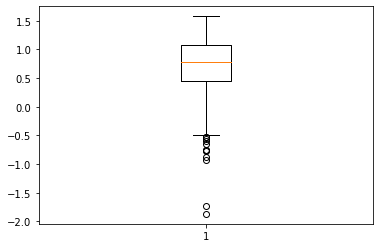

In [ ]:
plt.boxplot(df_all['공급미달량'])